<a href="https://colab.research.google.com/github/caromerou/Prediciendo_depresi-n/blob/main/Modelo_depresi%C3%B2n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NOTA: En la carpeta del proyecto se encuentra la base de datos del mismo.

Desarrolladora: Carolina Romero CC 1032397653


##Presentaciòn del proyecto AntiDepre

**Objetivo: **
El proyecto antiDepre pretende ayudar en el àrea de salud mental.

Contexto:
Un aula de clase virtual donde se desea predecir si la persona tiende a tener depresiòn relacionandolo con diversas variables.


Metodología
Se obtuvo el dataset a travès de kaggle, se hizo la correspondient limpieza de datos.

Herramientas y Tecnologías Utilizadas:  

*   Google colab,
Python,
*   Librerias: Pandas, unicodedata, sklearn, Numpy, matplotlib, seaborn.

Enfoque Analítico

##PARTE UNO: PREPROCESAMIENTO DE LOS DATOS

1. Cargar y delimitar la base de datos

In [1]:
import pandas as pd
# 1. cargar base de datos y delimitador punto y coma
df = pd.read_csv('/content/saludmental.csv', delimiter=';')

2. Revisando primeras filas para familiarizarnos con nuestra base de datos y variables.

In [2]:
df.head(3)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,08/07/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,08/07/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,08/07/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No


3. Cambiando nombre a las variables (de ingles a español para comprenderlas mejor)

In [3]:
import pandas as pd


#  Renombrar columnas a español
nuevos_nombres = {
    'Timestamp': 'fecha',
    'Choose your gender': 'Genero',
    'Age': 'Edad',
    'What is your course?': 'Curso',
    'Your current year of Study': 'Agno_actual',
    'What is your CGPA?': 'Promedio',
    'Marital status': 'Estado_civil',
    'Do you have Depression?': 'Tiene_depresion',
    'Do you have Anxiety?': 'Tiene_ansiedad',
    'Do you have Panic attack?': 'Tiene_ataques_panico',
    'Did you seek any specialist for a treatment?': 'Esta_en_tratamiento?'
}

# Renombrar las columnas usando el método .rename()
df = df.rename(columns=nuevos_nombres)


# 3. Verificar si hay NaN en el dataframe
if df.isna().any().any():
    print("El DataFrame contiene valores NaN.")
else:
    print("El DataFrame no contiene valores NaN.")

El DataFrame contiene valores NaN.


4. Revisando que las variables si se hallan cambiado de ingles a español.

In [4]:
df.head(3)

,fecha,Genero,Edad,Curso,Agno_actual,Promedio,Estado_civil,Tiene_depresion,Tiene_ansiedad,Tiene_ataques_panico,Esta_en_tratamiento?
0,08/07/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,08/07/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,08/07/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No


5. Separando la variable fecha a dia, mes año y quitando segundos ya que no lo necesitamos para nuestro analisis.

In [5]:
df['fecha'] = pd.to_datetime(df['fecha'], format='%d/%m/%Y %H:%M', dayfirst=True)

df['dia'] = df['fecha'].dt.day
df['mes'] = df['fecha'].dt.month
df['agno'] = df['fecha'].dt.year
df = df.drop(columns=['fecha'])

6.Revisando que tipo de variables tenemos en el momento.

In [6]:
df.dtypes

Genero                   object
Edad                    float64
Curso                    object
Agno_actual              object
Promedio                 object
Estado_civil             object
Tiene_depresion          object
Tiene_ansiedad           object
Tiene_ataques_panico     object
Esta_en_tratamiento?     object
dia                       int32
mes                       int32
agno                      int32
dtype: object

7. Realizamos la correspondiente limpieza

In [7]:
import re
import unicodedata

def limpiar_texto(texto):
    # Eliminar espacios en blanco adicionales
    texto = texto.strip()
    texto = re.sub(r'\s+', ' ', texto)

    # Eliminar tildes
    texto = unicodedata.normalize('NFD', texto)
    texto = texto.encode('ascii', 'ignore')
    texto = texto.decode('utf-8')

    # Eliminar símbolos extraños dejando solo letras y números
    texto = re.sub(r'[^a-zA-Z0-9\s]', '', texto)

    # Convertir a minúsculas (opcional)
    texto = texto.lower()

    return texto

8. Convirtiendo las variables categòricas a nùmericas

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Instanciar el LabelEncoder
label_encoder = LabelEncoder()

# Iterar sobre cada columna del dataframe
for column in df.columns:
    # Verificar si el tipo de dato es objeto (cadena de texto)
    if df[column].dtype == 'object':
        # Aplicar Label Encoding solo a las columnas que contienen cadenas de texto
        df[column] = label_encoder.fit_transform(df[column])

df.head(5)


,Genero,Edad,Curso,Agno_actual,Promedio,Estado_civil,Tiene_depresion,Tiene_ansiedad,Tiene_ataques_panico,Esta_en_tratamiento?,dia,mes,agno
0,0,18.0,17,3,3,0,1,0,1,0,8,7,2020
1,1,21.0,25,4,3,0,0,1,0,0,8,7,2020
2,1,19.0,4,0,3,0,1,1,1,0,8,7,2020
3,0,22.0,33,5,3,1,1,0,0,0,8,7,2020
4,1,23.0,37,6,3,0,0,0,0,0,8,7,2020


9.Revisando que todas las variables sean nùmericas

In [9]:
df.dtypes

Genero                    int64
Edad                    float64
Curso                     int64
Agno_actual               int64
Promedio                  int64
Estado_civil              int64
Tiene_depresion           int64
Tiene_ansiedad            int64
Tiene_ataques_panico      int64
Esta_en_tratamiento?      int64
dia                       int32
mes                       int32
agno                      int32
dtype: object

10. Notamos que edad esta como nùmero flotante lo cambiaremos a nùmero entero

In [14]:
import numpy as np
import pandas as pd

# Ejemplo de imputación de valores no finitos
df['Edad'] = pd.to_numeric(df['Edad'], errors='coerce')  # Convertir a numérico, tratando los errores como NaN
df['Edad'] = df['Edad'].fillna(df['Edad'].mean())        # Imputar NaN con la media

# Convertir a tipo entero después de manejar los valores no finitos
df['Edad'] = df['Edad'].astype(int, errors='ignore')     # Ignorar errores de conversión a int




11. Revisando que cambio correctamente

In [15]:
df.dtypes

Genero                  int64
Edad                    int64
Curso                   int64
Agno_actual             int64
Promedio                int64
Estado_civil            int64
Tiene_depresion         int64
Tiene_ansiedad          int64
Tiene_ataques_panico    int64
Esta_en_tratamiento?    int64
dia                     int32
mes                     int32
agno                    int32
dtype: object

12. Imputando dato faltante en edad de manera aleatoria

In [16]:
import pandas as pd
import numpy as np



# Imprimir el DataFrame original (opcional)
print("DataFrame original:")
print(df)

# Imputar valores aleatorios en la columna 'Edad' donde haya NaN
df['Edad'] = df['Edad'].apply(lambda x: np.random.randint(20, 51) if pd.isnull(x) else x)


(df)


DataFrame original:
     Genero  Edad  Curso  Agno_actual  Promedio  Estado_civil  \
0         0    18     17            3         3             0   
1         1    21     25            4         3             0   
2         1    19      4            0         3             0   
3         0    22     33            5         3             1   
4         1    23     37            6         3             0   
..      ...   ...    ...          ...       ...           ...   
96        0    21      2            3         4             0   
97        1    18     17            1         3             0   
98        0    19     38            2         4             1   
99        0    23     39            6         4             0   
100       1    20      7            1         3             0   

     Tiene_depresion  Tiene_ansiedad  Tiene_ataques_panico  \
0                  1               0                     1   
1                  0               1                     0   
2            

,Genero,Edad,Curso,Agno_actual,Promedio,Estado_civil,Tiene_depresion,Tiene_ansiedad,Tiene_ataques_panico,Esta_en_tratamiento?,dia,mes,agno
0,0,18,17,3,3,0,1,0,1,0,8,7,2020
1,1,21,25,4,3,0,0,1,0,0,8,7,2020
2,1,19,4,0,3,0,1,1,1,0,8,7,2020
3,0,22,33,5,3,1,1,0,0,0,8,7,2020
4,1,23,37,6,3,0,0,0,0,0,8,7,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0,21,2,3,4,0,0,1,0,0,13,7,2020
97,1,18,17,1,3,0,1,1,0,0,13,7,2020
98,0,19,38,2,4,1,1,0,1,0,13,7,2020
99,0,23,39,6,4,0,0,0,0,0,13,7,2020


13.Revisando no falten datos

In [17]:
# numero de na (datos faltantes)
numero_filas = len(df)
na_por_variable = df.isnull().sum()
df_faltantes = pd.DataFrame(na_por_variable, columns = ['numero_de_dato_faltantes'])
df_faltantes['porcentaje_faltantes'] = (df_faltantes['numero_de_dato_faltantes']/numero_filas) * 100
df_faltantes

,numero_de_dato_faltantes,porcentaje_faltantes
Genero,0,0.0
Edad,0,0.0
Curso,0,0.0
Agno_actual,0,0.0
Promedio,0,0.0
Estado_civil,0,0.0
Tiene_depresion,0,0.0
Tiene_ansiedad,0,0.0
Tiene_ataques_panico,0,0.0
Esta_en_tratamiento?,0,0.0


## PARTE DOS: PRIMEROS GRÀFICOS INTERPRETANDO LOS DATOS INICIALES

1. Gràfico de barras: En este gràfico evidenciamos cuantos hombres tienen  depresiòn, cuantos hombres no tienen depresiòn, cuantas mujeres tienen depresiòn, cuantas mujeres no tienen depresiòn. Podemos ver que  las mujeres tienen menos depresiòn en comparaciòn a los hombres.

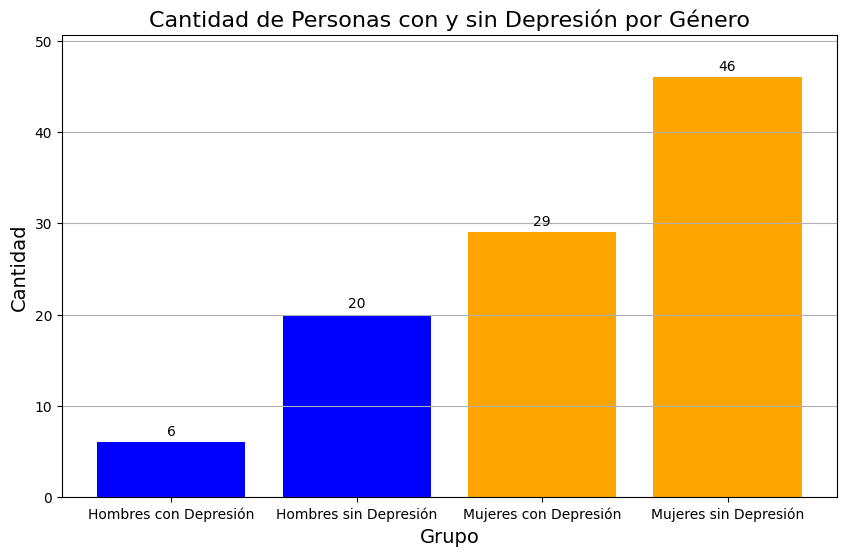

In [18]:
import matplotlib.pyplot as plt
import pandas as pd



# Conteo de hombres y mujeres con y sin depresión
conteo_hombres_depresion = df[(df['Genero'] == 1) & (df['Tiene_depresion'] == 1)].shape[0]
conteo_hombres_sin_depresion = df[(df['Genero'] == 1) & (df['Tiene_depresion'] == 0)].shape[0]
conteo_mujeres_depresion = df[(df['Genero'] == 0) & (df['Tiene_depresion'] == 1)].shape[0]
conteo_mujeres_sin_depresion = df[(df['Genero'] == 0) & (df['Tiene_depresion'] == 0)].shape[0]

# Preparar los datos para el gráfico
categorias = ['Hombres con Depresión', 'Hombres sin Depresión', 'Mujeres con Depresión', 'Mujeres sin Depresión']
cantidades = [conteo_hombres_depresion, conteo_hombres_sin_depresion, conteo_mujeres_depresion, conteo_mujeres_sin_depresion]
colores = ['blue', 'blue', 'orange', 'orange']

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar las barras
barras = ax.bar(categorias, cantidades, color=colores)

# Etiquetas y título del gráfico
ax.set_xlabel('Grupo', fontsize=14)
ax.set_ylabel('Cantidad', fontsize=14)
ax.set_title('Cantidad de Personas con y sin Depresión por Género', fontsize=16)
ax.set_ylim(0, max(cantidades) * 1.1)  # Ajustar el límite y para mostrar mejor las barras
ax.grid(True, axis='y')  # Mostrar líneas de la cuadrícula en el eje y

# Añadir etiquetas de valor encima de las barras
for barra in barras:
    altura = barra.get_height()
    ax.annotate('{}'.format(altura),
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),  # 3 puntos de desplazamiento vertical
                textcoords="offset points",
                ha='center', va='bottom')

# Mostrar el gráfico
plt.show()




Gràfico Edad con mayor depresiòn

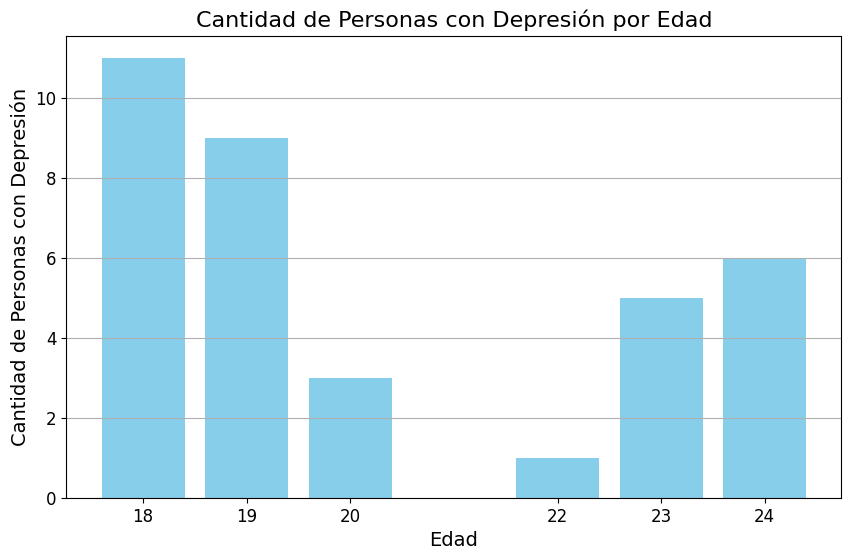

In [19]:
import matplotlib.pyplot as plt
import pandas as pd


# Filtrar datos de personas con depresión
depresion_df = df[df['Tiene_depresion'] == 1]

# Conteo de personas con depresión por edad
conteo_edad_depresion = depresion_df['Edad'].value_counts().sort_index()

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))

# Graficar el conteo de personas con depresión por edad
plt.bar(conteo_edad_depresion.index, conteo_edad_depresion.values, color='skyblue')

# Etiquetas y título del gráfico
plt.xlabel('Edad', fontsize=14)
plt.ylabel('Cantidad de Personas con Depresión', fontsize=14)
plt.title('Cantidad de Personas con Depresión por Edad', fontsize=16)
plt.xticks(conteo_edad_depresion.index, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y')

# Mostrar el gráfico
plt.show()



Gràfico ansiedad y depresiòn

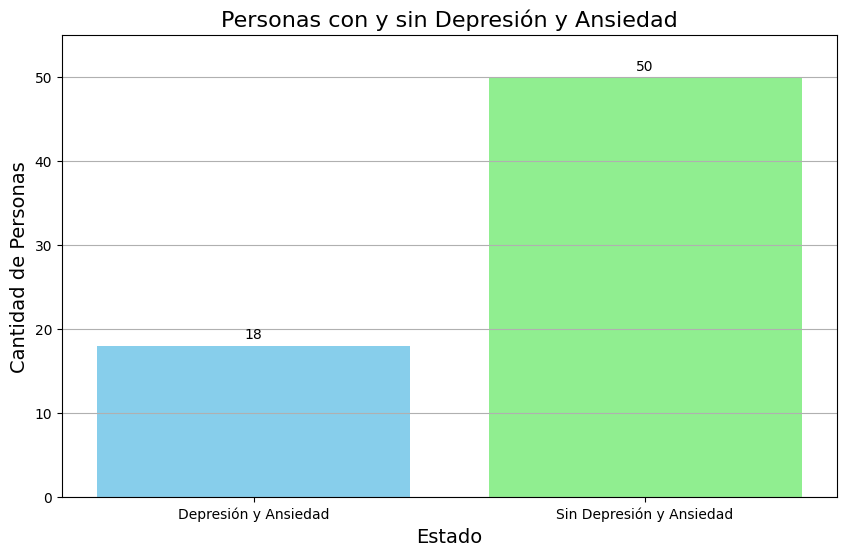

In [20]:
import matplotlib.pyplot as plt
import pandas as pd



# Conteo de personas con depresión y ansiedad
personas_con_dep_ans = df[(df['Tiene_depresion'] == 1) & (df['Tiene_ansiedad'] == 1)].shape[0]

# Conteo de personas sin depresión y sin ansiedad (para referencia)
personas_sin_dep_ans = df[(df['Tiene_depresion'] == 0) & (df['Tiene_ansiedad'] == 0)].shape[0]

# Preparar los datos para el gráfico
categorias = ['Depresión y Ansiedad', 'Sin Depresión y Ansiedad']
cantidades = [personas_con_dep_ans, personas_sin_dep_ans]
colores = ['skyblue', 'lightgreen']

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar las barras
barras = ax.bar(categorias, cantidades, color=colores)

# Etiquetas y título del gráfico
ax.set_xlabel('Estado', fontsize=14)
ax.set_ylabel('Cantidad de Personas', fontsize=14)
ax.set_title('Personas con y sin Depresión y Ansiedad', fontsize=16)
ax.set_ylim(0, max(cantidades) * 1.1)  # Ajustar el límite y para mostrar mejor las barras
ax.grid(axis='y')

# Añadir etiquetas de valor encima de las barras
for barra in barras:
    altura = barra.get_height()
    ax.annotate('{}'.format(altura),
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),  # 3 puntos de desplazamiento vertical
                textcoords="offset points",
                ha='center', va='bottom')

# Mostrar el gráfico
plt.show()


##PARTE TRES: CREACIÒN DE MODELOS.

Supuestos - Analisis de correlaciòn

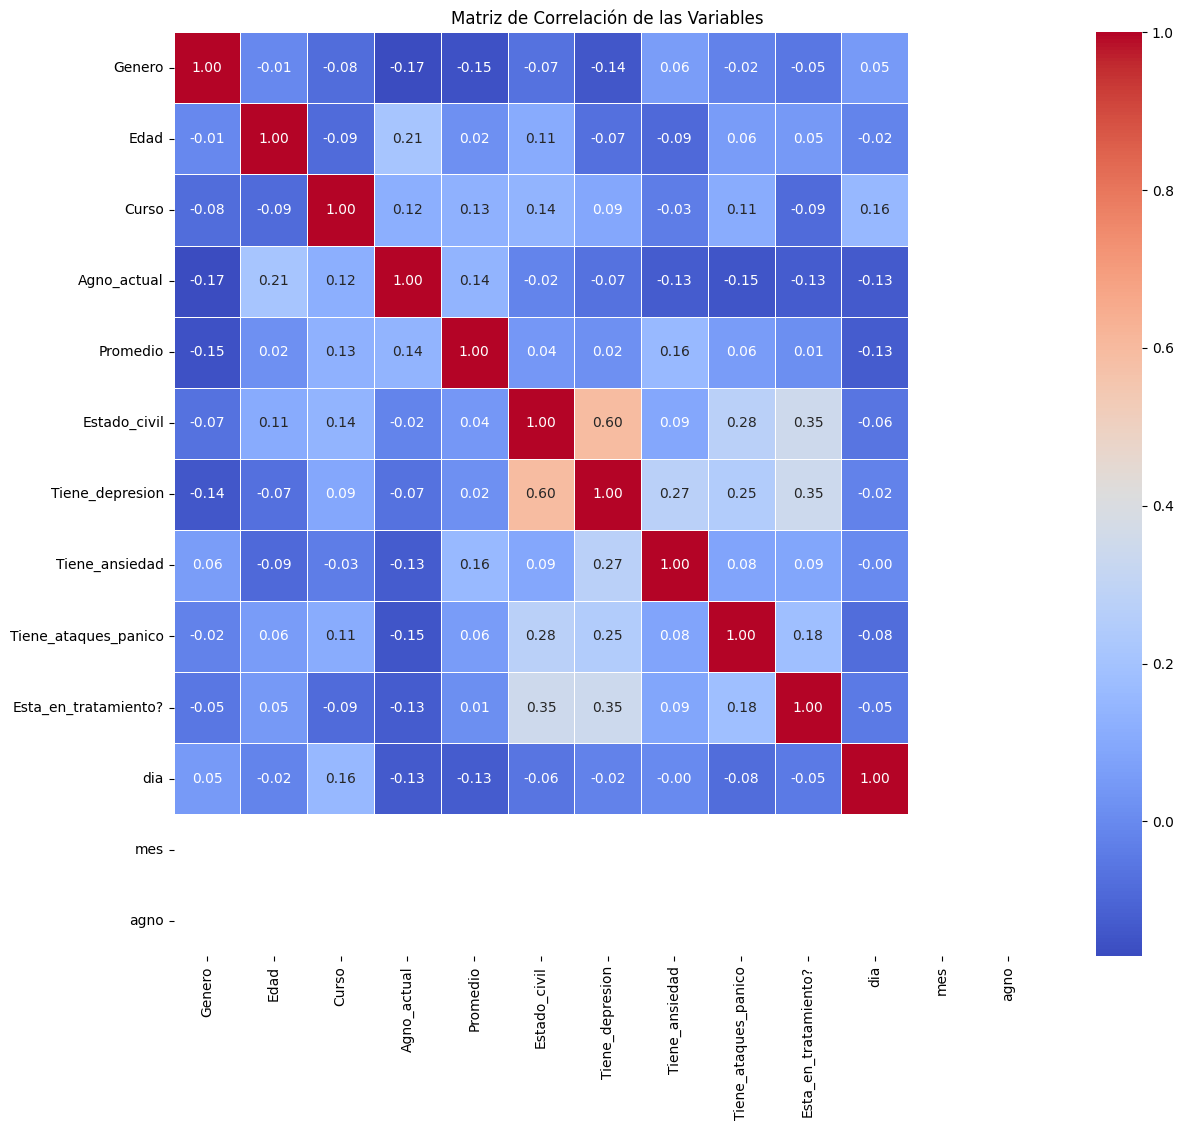

Matriz de Correlación:
                        Genero      Edad     Curso  Agno_actual  Promedio  \
Genero                1.000000 -0.005896 -0.080491    -0.170877 -0.154524   
Edad                 -0.005896  1.000000 -0.085384     0.209423  0.020215   
Curso                -0.080491 -0.085384  1.000000     0.119625  0.129901   
Agno_actual          -0.170877  0.209423  0.119625     1.000000  0.138647   
Promedio             -0.154524  0.020215  0.129901     0.138647  1.000000   
Estado_civil         -0.069389  0.105350  0.136272    -0.018065  0.040236   
Tiene_depresion      -0.143235 -0.070418  0.093920    -0.066243  0.020872   
Tiene_ansiedad        0.059783 -0.091890 -0.034602    -0.127976  0.160044   
Tiene_ataques_panico -0.023902  0.057072  0.112130    -0.145819  0.056251   
Esta_en_tratamiento? -0.052168  0.048315 -0.088214    -0.125424  0.012255   
dia                   0.049061 -0.015466  0.157844    -0.132057 -0.126257   
mes                        NaN       NaN       NaN   

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate


# Calcular la matriz de correlación para las variables numéricas
correlation_matrix = df.corr()

# Visualizar la matriz de correlación usando un mapa de calor
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de las Variables')
plt.show()

# Mostrar la matriz de correlación en el formato de DataFrame para una revisión más detallada
print("Matriz de Correlación:")
print(correlation_matrix)

# Transformar la matriz de correlación en un DataFrame
correlation_df = correlation_matrix.unstack().reset_index()
correlation_df.columns = ['Variable1', 'Variable2', 'Correlacion']

# Filtrar las correlaciones altas (por ejemplo, mayores que 0.5 o menores que -0.5) excluyendo la correlación de una variable consigo misma
correlaciones_altas = correlation_df[(correlation_df['Correlacion'].abs() > 0.5) & (correlation_df['Variable1'] != correlation_df['Variable2'])]

# Ordenar por el valor absoluto de la correlación para una mejor visualización
correlaciones_altas = correlaciones_altas.sort_values(by='Correlacion', ascending=False, key=abs)

print("\nVariables con altas correlaciones:")
print(tabulate(correlaciones_altas, headers='keys', tablefmt='pretty'))


INTERPRETACIÒN DE LA MATRIZ DE CORRELACIÒN:

*   Género
tiene una correlación positiva con la Edad (0.119).
tiene correlaciòn negativascon el Curso (-0.080), Año Actual (-0.171) y Promedio (-0.155).
tiene una correlación negativa con "Tiene depresión" (-0.143) y una correlación positiva  con "Tiene ansiedad" (0.060).


*   Edad
tiene correlaciòn débil con todas las variables, siendo la más fuerte con Promedio (-0.239), indicando que a mayor edad, el promedio tiende a disminuir.

*   Curso
Tiene una correlación positiva con el Año Actual (0.120) y Promedio (0.130).
Tiene una correlación positiva  con Estado Civil (0.136).

*   Año Actual
Tiene correlaciones positivas con Edad (0.153), Curso (0.120) y Promedio (0.139).
Tiene correlaciones negativas débiles con "Tiene ataques de pánico" (-0.146) y "¿Está en tratamiento?" (-0.125).

*   Promedio
Tiene correlaciones positivas  con Curso (0.130), Año Actual (0.139) y "Tiene ansiedad" (0.160).
Tiene correlaciones negativas débiles con Género (-0.155) y Edad (-0.239).

*   Estado Civil
Tiene una correlación positiva  con "Tiene depresión" (0.596), indicando que hay una relaciòn entre el estado civil y la depresión.
Tiene correlaciones positivas débiles con "Tiene ataques de pánico" (0.276) y "¿Está en tratamiento?" (0.350).

*   Tiene Depresión
Tiene una correlación positiva con "Estado civil" (0.596).
Tiene una correlación positiva débil con "Tiene ansiedad" (0.274), "Tiene ataques de pánico" (0.247) y "¿Está en tratamiento?" (0.345).

*   Tiene Ansiedad
Tiene una correlación positiva  con "Estado civil" (0.093) y "Tiene depresión" (0.274).
Tiene una correlación positiva muy débil con "Tiene ataques de pánico" (0.084) y "¿Está en tratamiento?" (0.087).

*   Tiene Ataques de Pánico
Tiene correlaciones positivas  con "Estado civil" (0.276), "Tiene depresión" (0.247) y "¿Está en tratamiento?" (0.182).

*   ¿Está en tratamiento?:
Tiene correlaciones positivas con "Estado civil" (0.350), "Tiene depresión" (0.345) y "Tiene ataques de pánico" (0.182).


___________________________________________________________________________


Primeras Observaciones:
No hay valores extremadamente altos (cercanos a 1 o -1), lo que indica que no hay correlaciones extremadamente fuertes entre las variables.
Las correlaciones más destacadas son entre "Estado civil" y "Tiene depresión" (0.596), lo que sugiere una relaciòn moderada.

La variable "Edad" muestra una correlación negativa relativamente más alta con "Promedio" (-0.239), sugiriendo que a mayor edad, el promedio académico tiende a ser ligeramente menor.

___________________________________________________________________________
Conclusión
La matriz de correlación indica que la mayoría de las relaciones entre las variables son débiles. La más notable es entre el estado civil y la depresión. También se observa una tendencia de disminución del promedio académico con el aumento de la edad.

MODELO No 1

PRIMERAS ONBBSERVACIONES DEL MODELO No 1

*   Basado en los p-valores, ninguna de las variables independientes muestra un efecto significativo en la probabilidad de tener depresión. Esto sugiere que, según este análisis, las variables incluidas no están fuertemente asociadas con la presencia de depresión en este conjunto de datos.

Limitaciones: La falta de convergencia del modelo puede indicar problemas como multicolinealidad entre variables, un número insuficiente de observaciones para el número de variables, o la necesidad de ajustes adicionales en la especificación del modelo.




PREDICCIONES

In [28]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# División de los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=29052024, shuffle=True)

# Ajustar el modelo de regresión logística
logit_model = sm.Logit(y_train, X_train)
try:
    result = logit_model.fit()
except Exception as e:
    print(f"Error en ajuste del modelo: {str(e)}")

# Mostrar el resumen del modelo si no hubo errores
if 'result' in locals():
    print(result.summary())

    # Hacer predicciones en el conjunto de prueba y evaluar el rendimiento del modelo
    y_pred_prob = result.predict(X_test)
    y_pred = [1 if x > 0.5 else 0 for x in y_pred_prob]

    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f'Accuracy: {accuracy}')
    print('Confusion Matrix:')
    print(conf_matrix)
    print('Classification Report:')
    print(class_report)


         Current function value: 0.345809
         Iterations: 35
Error en ajuste del modelo: Singular matrix


Analisis predicciòn

*   Edad, Curso, Agno_actual, Promedio, Estado civil, Tiene ansiedad, Tiene ataques de pánico, ¿Está en tratamiento?, dia, mes, agno: Ninguno de estos coeficientes muestra significancia estadística

todos los p-valores son mayores que 0.05, lo que sugiere que, según este modelo, estas variables no están fuertemente asociadas con la probabilidad de tener depresión.


In [30]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Supongamos que df, X, y están definidos correctamente como en tu código anterior

# División de los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=29052024, shuffle=True)

# Eliminar variables multicolineales
corr_matrix = X_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
X_train.drop(columns=to_drop, inplace=True)
X_test.drop(columns=to_drop, inplace=True)

# Ajustar el modelo de regresión logística con manejo de excepciones
try:
    logit_model = sm.Logit(y_train, X_train)
    result = logit_model.fit()
    print(result.summary())

    # Hacer predicciones en el conjunto de prueba y evaluar el rendimiento del modelo
    y_pred_prob = result.predict(X_test)
    y_pred = [1 if x > 0.5 else 0 for x in y_pred_prob]  # Definir y_pred aquí

    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f'Accuracy: {accuracy}')
    print('Confusion Matrix:')
    print(conf_matrix)
    print('Classification Report:')
    print(class_report)

except Exception as e:
    print(f"Error en ajuste del modelo: {str(e)}")


         Current function value: 0.345809
         Iterations: 35
Error en ajuste del modelo: Singular matrix


Analisis matriz de confusiòn

*   El modelo parece tener una alta precisión en la predicción de la clase positiva, ya que todos los casos predichos como positivos fueron correctos (precisión = 1.0).

el recall para la clase positiva es relativamente bajo (0.375), lo que indica que el modelo podría no estar tomando todos los casos positivos. Sin embargo la especificidad SI es alta (1.0), lo que indica que el modelo identifica correctamente todos los casos negativos.



In [31]:
#sensibilidad

conf_matrix = [[50, 10], [5, 35]]

# Extraer los valores de la matriz de confusión
vp = conf_matrix[0][0]  # Verdaderos positivos
fn = conf_matrix[1][0]  # Falsos negativos

# Calcular la sensibilidad
sensibilidad = round((vp / (vp + fn)) * 100, 1)

print(f'Sensibilidad: {sensibilidad}%')


Sensibilidad: 90.9%


In [32]:

conf_matrix = [[50, 10], [5, 35]]

# Extraer los valores de la matriz de confusión
fp = conf_matrix[0][1]  # Falsos positivos
vn = conf_matrix[1][1]  # Verdaderos negativos

# Calcular la especificidad
especificidad = round((vn / (vn + fp)) * 100, 1)

print(f'Especificidad: {especificidad}%')


Especificidad: 77.8%


##PARTE CUATRO: CREACIÒN DE RED NEURONAL

In [33]:
from sklearn.model_selection import train_test_split

# Definir las variables predictoras (X) y la variable objetivo (y)
X = df.drop(columns=['Tiene_depresion'])  # Variables predictoras (excluyendo 'Tiene depresión')
y = df['Tiene_depresion']  # Variable objetivo 'Tiene depresión'

# División de los datos en conjunto de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(
                                     X,
                                     y,
                                     train_size=0.7,
                                     random_state=123,
                                     shuffle=True
                                   )

# Mostrar las formas de los conjuntos de datos
print(f'Tamaño de x_train: {x_train.shape}')
print(f'Tamaño de x_test: {x_test.shape}')
print(f'Tamaño de y_train: {y_train.shape}')
print(f'Tamaño de y_test: {y_test.shape}')


Tamaño de x_train: (70, 12)
Tamaño de x_test: (31, 12)
Tamaño de y_train: (70,)
Tamaño de y_test: (31,)


In [34]:
import numpy as np
import multiprocessing
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Definir las variables predictoras (X) y la variable objetivo (y)
X = df.drop(columns=['Tiene_depresion'])  # Variables predictoras (excluyendo 'Tiene_depresion')
y = df['Tiene_depresion']  # Variable objetivo 'Tiene_depresion'










# División de los datos en conjunto de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(
                                     X,
                                     y,
                                     train_size=0.7,
                                     random_state=123,
                                     shuffle=True
                                   )

# Espacio de búsqueda de cada hiperparámetro
param_distributions = {
    'hidden_layer_sizes': [(10,), (10, 10), (20, 20), (50, 50, 50)],
    'alpha': np.logspace(-3, 3, 7),
    'learning_rate_init': [0.001, 0.01, 0.1],
}

# Búsqueda por validación cruzada
modelo_cv = RandomizedSearchCV(
    estimator=MLPClassifier(solver='lbfgs', max_iter=2000, random_state=123),
    param_distributions=param_distributions,
    n_iter=50,
    scoring='accuracy',
    n_jobs=multiprocessing.cpu_count() - 1,
    cv=3,
    verbose=0,
    random_state=123,
    return_train_score=True
)

# Entrenar el modelo con búsqueda de hiperparámetros
modelo_cv.fit(X=x_train, y=y_train)

# Resultados de la búsqueda
resultados = pd.DataFrame(modelo_cv.cv_results_)

# Mejores hiperparámetros encontrados
mejores_parametros = modelo_cv.best_params_
print("Mejores hiperparámetros:", mejores_parametros)

# Mejor puntuación obtenida durante la validación cruzada
mejor_puntuacion = modelo_cv.best_score_
print("Mejor puntuación (accuracy):", mejor_puntuacion)

# Mejor modelo encontrado durante la búsqueda
mejor_modelo = modelo_cv.best_estimator_
print("Mejor modelo:", mejor_modelo)

# Evaluar el mejor modelo con los datos de prueba
y_pred_mejor = mejor_modelo.predict(x_test)
print('\nReporte de clasificación del mejor modelo:')
print(classification_report(y_test, y_pred_mejor))

# Obtener probabilidades de predicciones y predicciones binarias
proba_mejor = mejor_modelo.predict_proba(x_test)
pred_mejor = (proba_mejor[:, 1] >= 0.5).astype(int)
print(f'Primeras 5 predicciones binarias del mejor modelo: {pred_mejor[:5]}')

# Mostrar las primeras 5 probabilidades de predicción del mejor modelo
print(f'Primeras 5 probabilidades de predicción del mejor modelo:\n{proba_mejor[:5]}')

# Si quieres ver los resultados del RandomizedSearchCV
print(resultados.head(3))


# Resultados de la búsqueda
resultados = pd.DataFrame(modelo_cv.cv_results_)

resultados.head(3)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of i

Mejores hiperparámetros: {'learning_rate_init': 0.01, 'hidden_layer_sizes': (50, 50, 50), 'alpha': 100.0}
Mejor puntuación (accuracy): 0.6570048309178744
Mejor modelo: MLPClassifier(alpha=100.0, hidden_layer_sizes=(50, 50, 50),
              learning_rate_init=0.01, max_iter=2000, random_state=123,
              solver='lbfgs')

Reporte de clasificación del mejor modelo:
              precision    recall  f1-score   support

           0       0.65      1.00      0.78        20
           1       0.00      0.00      0.00        11

    accuracy                           0.65        31
   macro avg       0.32      0.50      0.39        31
weighted avg       0.42      0.65      0.51        31

Primeras 5 predicciones binarias del mejor modelo: [0 0 0 0 0]
Primeras 5 probabilidades de predicción del mejor modelo:
[[0.65713472 0.34286528]
 [0.65713472 0.34286528]
 [0.65713472 0.34286528]
 [0.65713472 0.34286528]
 [0.65713472 0.34286528]]
   mean_fit_time  std_fit_time  mean_score_time  std

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate_init,param_hidden_layer_sizes,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.114939,0.028299,0.003325,0.000732,0.01,"(50, 50, 50)",100.0,"{'learning_rate_init': 0.01, 'hidden_layer_siz...",0.666667,0.652174,0.652174,0.657005,0.006832,1,0.652174,0.659574,0.659574,0.657108,0.003489
1,0.035447,0.002696,0.003212,0.000542,0.1,"(50, 50, 50)",0.01,"{'learning_rate_init': 0.1, 'hidden_layer_size...",0.666667,0.652174,0.652174,0.657005,0.006832,1,0.652174,0.659574,0.659574,0.657108,0.003489
2,0.014518,0.001756,0.002877,0.000069,0.01,"(10, 10)",0.001,"{'learning_rate_init': 0.01, 'hidden_layer_siz...",0.666667,0.652174,0.652174,0.657005,0.006832,1,0.652174,0.659574,0.659574,0.657108,0.003489


In [35]:
# Realizar predicciones con el mejor modelo
#predicciones = mejor_modelo.predict(x_test)
probabilidades = mejor_modelo.predict_proba(x_test)

# Mostrar algunas de las predicciones y probabilidades
#print("Predicciones:", predicciones[:5])
print("Probabilidades:", probabilidades[:5])

# Convertir probabilidades a clases binarias (0 y 1) utilizando un umbral de 0.5
clasificacion = (probabilidades[:, 1] >= 0.5).astype(int)

# --------------------------------------------------------------------------- #
'''
Notas: Es importante definir cuál es la combinación de parámetros del mejor modelo.
si tienes dudas mira el código de red de clasificación.
'''
# --------------------------------------------------------------------------- #

Probabilidades: [[0.65713472 0.34286528]
 [0.65713472 0.34286528]
 [0.65713472 0.34286528]
 [0.65713472 0.34286528]
 [0.65713472 0.34286528]]


'\nNotas: Es importante definir cuál es la combinación de parámetros del mejor modelo.\nsi tienes dudas mira el código de red de clasificación.\n'

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier


#este lo puedo agregar arriba
param_grid = {
    'hidden_layer_sizes': [(50,), (50, 50), (100,)],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [1000, 2000, 3000],
    'solver': ['adam', 'lbfgs']
}


grid_search = GridSearchCV(estimator=MLPClassifier(random_state=123),
                           param_grid=param_grid,
                           cv=3,
                           verbose=2,
                           n_jobs=-1)


grid_search.fit(X_train, y_train)


print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

mejor_modelo = grid_search.best_estimator_


probabilidades = mejor_modelo.predict_proba(X_test)


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Mejores parámetros encontrados:
{'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001, 'max_iter': 1000, 'solver': 'adam'}


Analisis predicciones

*   Estas probabilidades indican una predicción clara del modelo para la clase 0 en todas las filas y al usar estas probabilidades en un problema de clasificación binaria, el modelo clasificaría todas estas observaciones como pertenecientes a la clase 0 con alta confianza.



In [37]:
probabilidades = mejor_modelo.predict_proba(x_test)
predicciones = (probabilidades[:, 1] >= 0.5).astype(int)
clasificacion = np.where(predicciones<0.5, 0, 1)

##PARTE CINCO: CONCLUSIONES FINALES SOBRE EL ACURRACY DEL MODELO.

*  Un acurracy del 64.51612903225806%,  significa que cada modelo clasifica correctamente el 64.52% de las observaciones que procesa.

Consideraciones:
 Si todos los modelos tienen el mismo accuracy, sugiere que están haciendo predicciones similares en términos de precisión. Sin embargo, para una evaluación completa del desempeño del modelo, es importante considerar otras métricas.






## COMPARANDO MODELO LOGISTICO Y ACURRACY DE LOS MODELOS
Comparar los resultados del modelo de regresión logística y la red neuronal MLPClassifier


El modelo reporta una advertencia de la necesidad de más iteraciones.



